In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
occupancy_detection = fetch_ucirepo(id=357) 
  
# data (as pandas dataframes) 
X = occupancy_detection.data.features 
y = occupancy_detection.data.targets 
  
# metadata 
print(occupancy_detection.metadata) 
  
# variable information 
print(occupancy_detection.variables) 


{'uci_id': 357, 'name': 'Occupancy Detection ', 'repository_url': 'https://archive.ics.uci.edu/dataset/357/occupancy+detection', 'data_url': 'https://archive.ics.uci.edu/static/public/357/data.csv', 'abstract': 'Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 20560, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Occupancy'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Apr 13 2024', 'dataset_doi': '10.24432/C5X01N', 'creators': ['Luis Candanedo'], 'intro_paper': {'ID': 470, 'type': 'NATIVE', 'title': 'Accurate occupancy detection of an office room from light, temperature, humidity and CO2

In [30]:
X.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.18,27.2720,426.0,721.25,0.004793
1,23.15,27.2675,429.5,714.00,0.004783
2,23.15,27.2450,426.0,713.50,0.004779
3,23.15,27.2000,426.0,708.25,0.004772
4,23.10,27.2000,426.0,704.50,0.004757


In [31]:
y.head()

,Occupancy
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20562 entries, 0 to 20561
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
dtypes: float64(5)
memory usage: 803.3 KB


In [35]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20562 entries, 0 to 20561
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Occupancy  20560 non-null  float64
dtypes: float64(1)
memory usage: 160.8 KB


In [36]:
y.value_counts()

# Imbalanced Dataset

Occupancy
0.0          15810
1.0           4750
Name: count, dtype: int64

In [ ]:
# Dropping ID and Date
X = X.drop('date', axis=1)

In [33]:
print(X.describe())
print(y.describe())

        Temperature      Humidity         Light           CO2  HumidityRatio
count  20560.000000  20560.000000  20560.000000  20560.000000   20560.000000
mean      20.906212     27.655925    130.756622    690.553276       0.004228
std        1.055315      4.982154    210.430875    311.201281       0.000768
min       19.000000     16.745000      0.000000    412.750000       0.002674
25%       20.200000     24.500000      0.000000    460.000000       0.003719
50%       20.700000     27.290000      0.000000    565.416667       0.004292
75%       21.525000     31.290000    301.000000    804.666667       0.004832
max       24.408333     39.500000   1697.250000   2076.500000       0.006476
          Occupancy
count  20560.000000
mean       0.231031
std        0.421503
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


## Basic EDA

In [22]:
len(X)

20562

In [25]:
np.where(X.isna())

(array([ 8143,  8143,  8143,  8143,  8143, 10809, 10809, 10809, 10809,
        10809]),
 array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4]))

In [29]:
X.loc[[8143, 10809]]

,Temperature,Humidity,Light,CO2,HumidityRatio
8143,NaN,NaN,NaN,NaN,NaN
10809,NaN,NaN,NaN,NaN,NaN


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20562 entries, 0 to 20561
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Temperature    20562 non-null  object
 1   Humidity       20562 non-null  object
 2   Light          20562 non-null  object
 3   CO2            20562 non-null  object
 4   HumidityRatio  20562 non-null  object
dtypes: object(5)
memory usage: 803.3+ KB


In [9]:
X = X.apply(pd.to_numeric, errors='coerce')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20562 entries, 0 to 20561
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
dtypes: float64(5)
memory usage: 803.3 KB


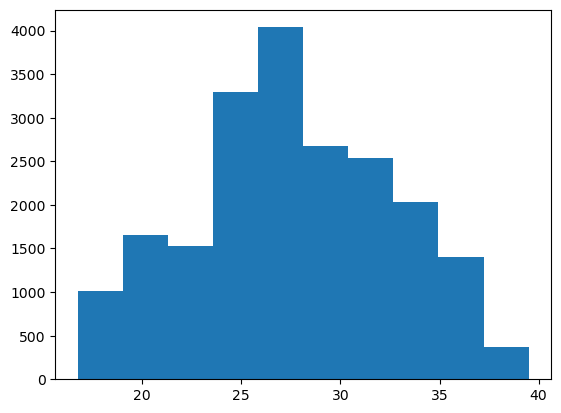

In [15]:
plt.hist(X['Humidity'])
plt.show()

In [11]:
X['Humidity'].dtype

dtype('float64')

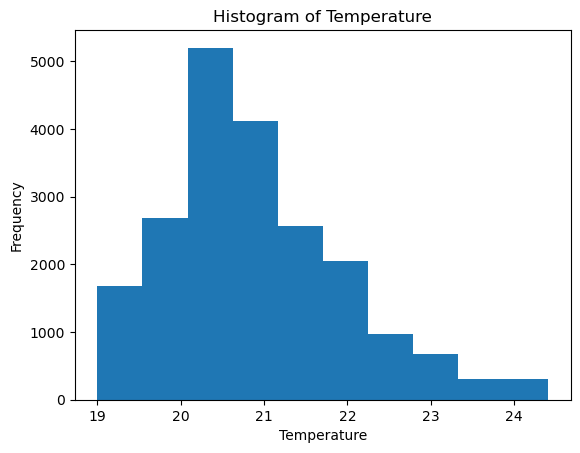

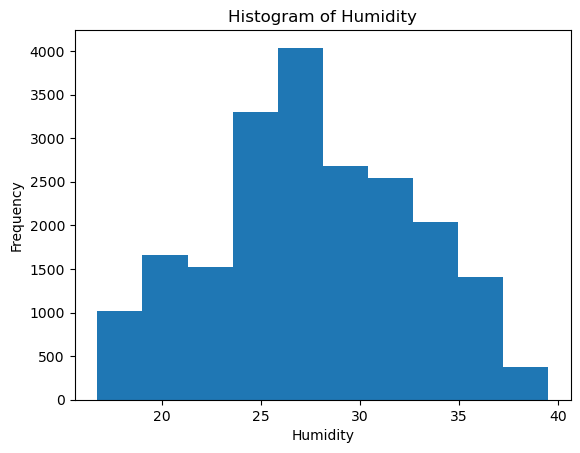

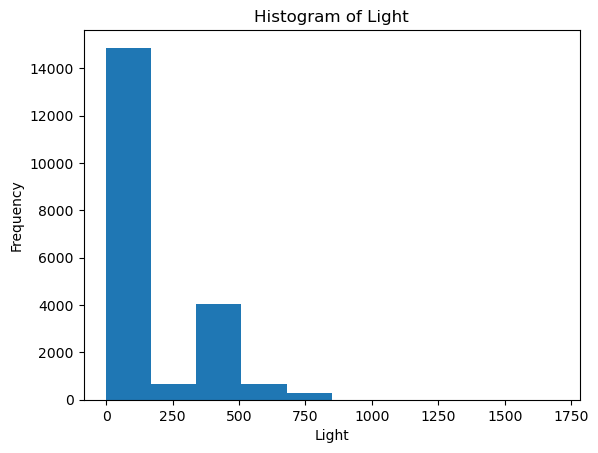

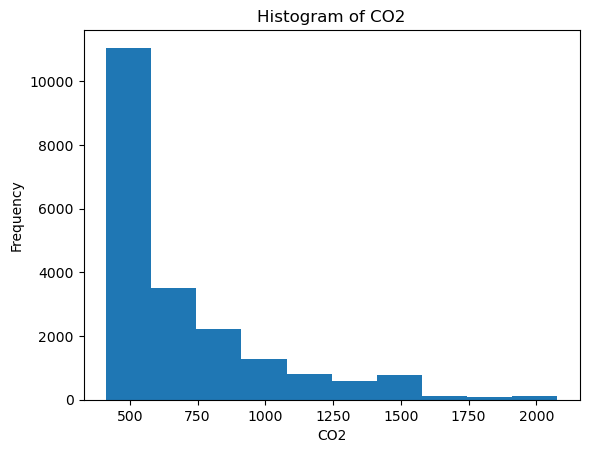

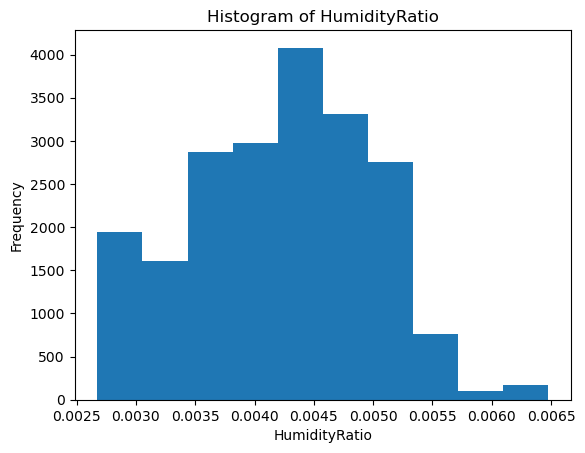

In [17]:
for col in X.columns: 
    plt.figure()
    plt.hist(X[col], bins = 10)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

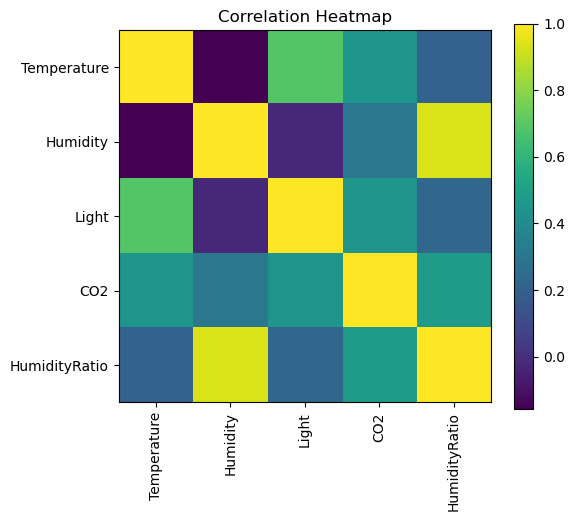

In [19]:
# ---- Correlation Heatmap ----
plt.figure(figsize=(6,5))
corr = X.corr()
plt.imshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

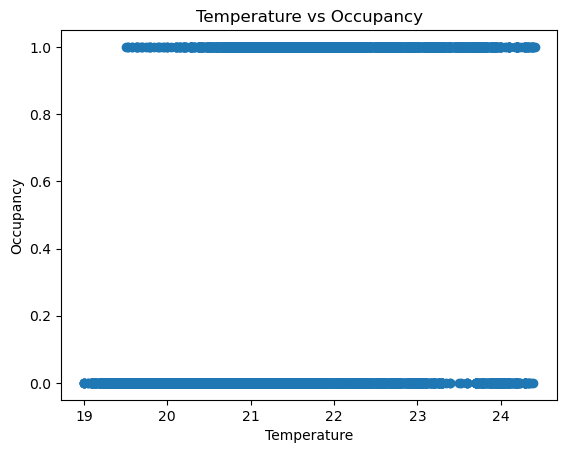

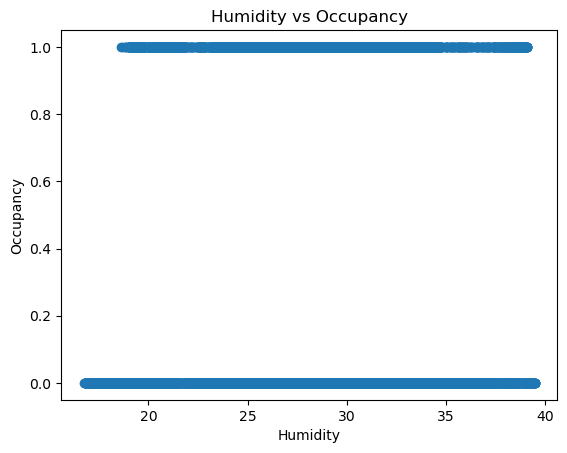

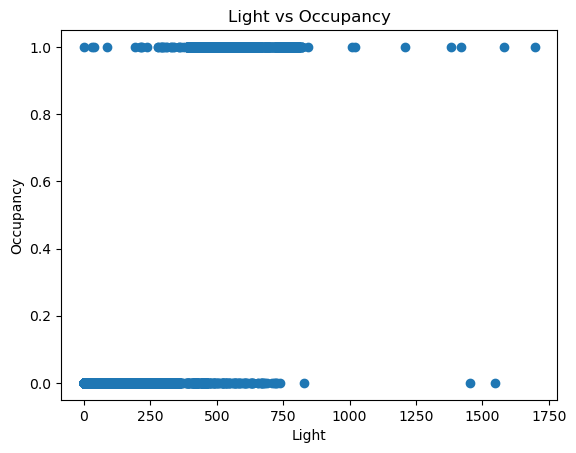

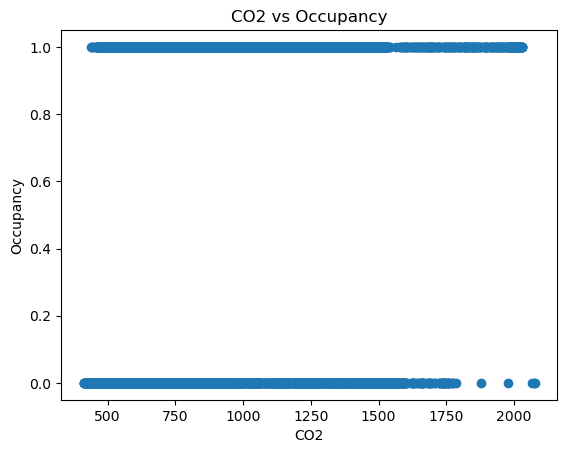

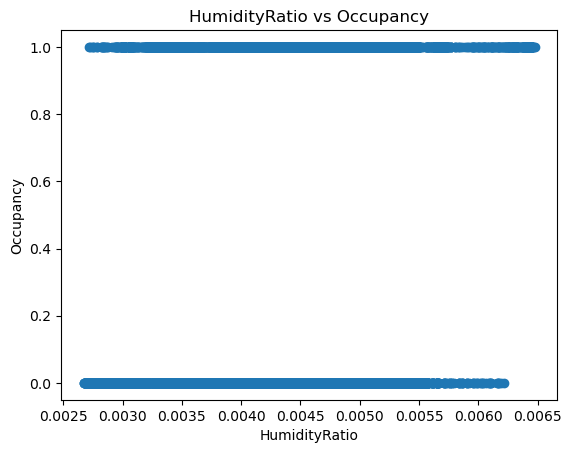

In [20]:
for col in X.columns:
    plt.figure()
    plt.scatter(X[col], y)
    plt.title(f"{col} vs Occupancy")
    plt.xlabel(col)
    plt.ylabel("Occupancy")
    plt.show()